# Machine Learning Homework- Simple Perceptron

Due Date-02/15/18

Avik Bhattacharya


# Information about the datasets:

Training set file is named as train.txt

Testing set file is named as test.txt

Both files are in the same folder as the notebook

The code will output a pdf file. Please see that also.

The packages used here are for matrix manipulations, data reading and plotting. 


In [1]:
import sys
print "Welcome to %s\n\n"%sys.version
print '===Importing the necessary libraries for the project==='
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

Welcome to 2.7.14 |Anaconda custom (64-bit)| (default, Oct  5 2017, 02:28:52) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


===Importing the necessary libraries for the project===


# Necessary Functions Defined

The sign function is used as activation function

In [2]:
def activation(x):
    if x>=1:
        return 1
    else:
        return -1

In [3]:
def train_algorithm(data,n_iter,learn_rate):
    weights=[]
    for i in range(1,np.shape(data)[1]):
        weights.append(0)
    for i in range (0,n_iter):
        for k in range(0,len(data)):
            inputs=data[k][0:np.shape(data)[1]-1]
            label=data[k][np.shape(data)[1]-1:np.shape(data)[1]]
            adder=0
            for i in range (1,np.shape(data)[1]):
                adder += inputs[i-1]*weights[i-1]
            guess=activation((adder))
            error=(label-guess)
            weights=weights+learn_rate*(error*inputs)
    return weights   

In [4]:
def test_algorithm(data,w):
    predicted=[]
    weights=w
    for k in range(0,len(data)):
        inputs=data[k][0:np.shape(data)[1]-1]
        adder=0
        for i in range(1,np.shape(data)[1]):
            adder += inputs[i-1]*weights[i-1]
        guess=activation(adder)
        predicted.append(guess)
    return predicted

In [5]:
def metrics(predicted, labels):
    tp=0.0
    fp=0.0
    tn=0.0
    fn=0.0
    for i in range(0,len(labels)):
        if (labels[i]==1):
            if (predicted[i]==1):
                tp+=1
            else:
                fn+=1
        if (labels[i]==-1):
            if (predicted[i]==-1):
                tn+=1
            else:
                fp+=1
    accuracy=(tp+tn)*1.0/(tp+tn+fp+fn)
    return accuracy,tp,tn,fp,fn

In [6]:
def read_source(filename):
    df1=pd.read_csv(filename, header=None)
    data=df1.values
    for i in range (0,len(data)):
        temp=data[i][0]
        data[i][0]=data[i][np.shape(data)[1]-1]
        data[i][np.shape(data)[1]-1]=temp
    s=(np.shape(data)[0],np.shape(data)[1]+1)
    a=np.ones(s)
    for i in range(0,len(data)):
        if (data[i][np.shape(data)[1]-1]==0):
            data[i][np.shape(data)[1]-1]=-1
    for i in range (0,np.shape(data)[1]):
        for j in range(0,len(data)):
            a[j][i+1]=data[j][i]
    data=a
    return data

In [7]:
def plotter(start,end,step):
    y_axis=[]
    train_data=read_source('train.txt')
    learn_rate=0.001
    for n_iter in range(start,end,step):
        w=train_algorithm(train_data,n_iter,learn_rate)
        test_data=read_source('test.txt')
        predicted=test_algorithm(test_data,w)
        labels=[]
        for i in range(0,len(test_data)):
            labels.append(test_data[i][np.shape(test_data)[1]-1])
            labels[i]=int(labels[i])
        accuracy,tp,tn,fp,fn= metrics(predicted,labels)
        y_axis.append(accuracy)
    xaxis = np.arange(start,end,step)
    fig, ax = plt.subplots()
    ax.plot(xaxis, y_axis, 'r')
    ax.set_xlabel('No. of iterations (n_iter)')
    ax.set_ylabel('Classification Accuracy')
    plt.title('Response w.r.t n_iter')
    plt.savefig('n_iter vs acc.pdf')
    plt.show()
    ymax=max(y_axis)
    for i in range(start,end,step):
        if(y_axis[i]==ymax):
            n=i
    return (n)
    

# Main Code Here

===We train and test our method by varying the number of iterations===
===See the plot===


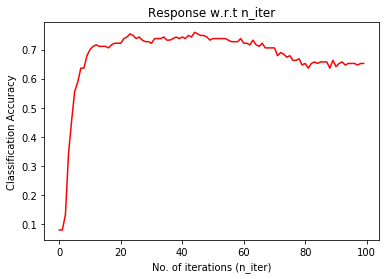

Best accuracy is obtained at n_iter = 44, so we select 44 iterations for our model

The model built on the basis of 44 iterations for our learning performs as below


Accuracy=75.935829 
tp=129 
tn=13 
fp=2 
fn=43

Done



In [8]:
print "===We train and test our method by varying the number of iterations===\n===See the plot==="
start=0
end=100
step=1
n_iter=plotter(start,end,step)
print "Best accuracy is obtained at n_iter = %d, so we select %d iterations for our model\n"%(n_iter,n_iter)

train_data=read_source('train.txt')
learn_rate=0.001
w=train_algorithm(train_data,n_iter,learn_rate)

test_data=read_source('test.txt')
predicted=test_algorithm(test_data,w)
labels=[]
for i in range(0,len(test_data)):
    labels.append(test_data[i][np.shape(test_data)[1]-1])
    labels[i]=int(labels[i])
accuracy,tp,tn,fp,fn= metrics(predicted,labels)
print "The model built on the basis of %d iterations for our learning performs as below\n"%(n_iter)
print "\nAccuracy=%f \ntp=%d \ntn=%d \nfp=%d \nfn=%d\n"%(accuracy*100,tp,tn,fp,fn)
print "Done\n"